In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.drop('id',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
def impute_smoking(row):
  if row['smoking_status']=='Unknown':
    if row['age']<10:
      row['smoking_status']='never smoked'

  return row

In [ ]:
df=df.apply(lambda row: impute_smoking(row),axis=1)

In [ ]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1072
stroke                  0
dtype: int64

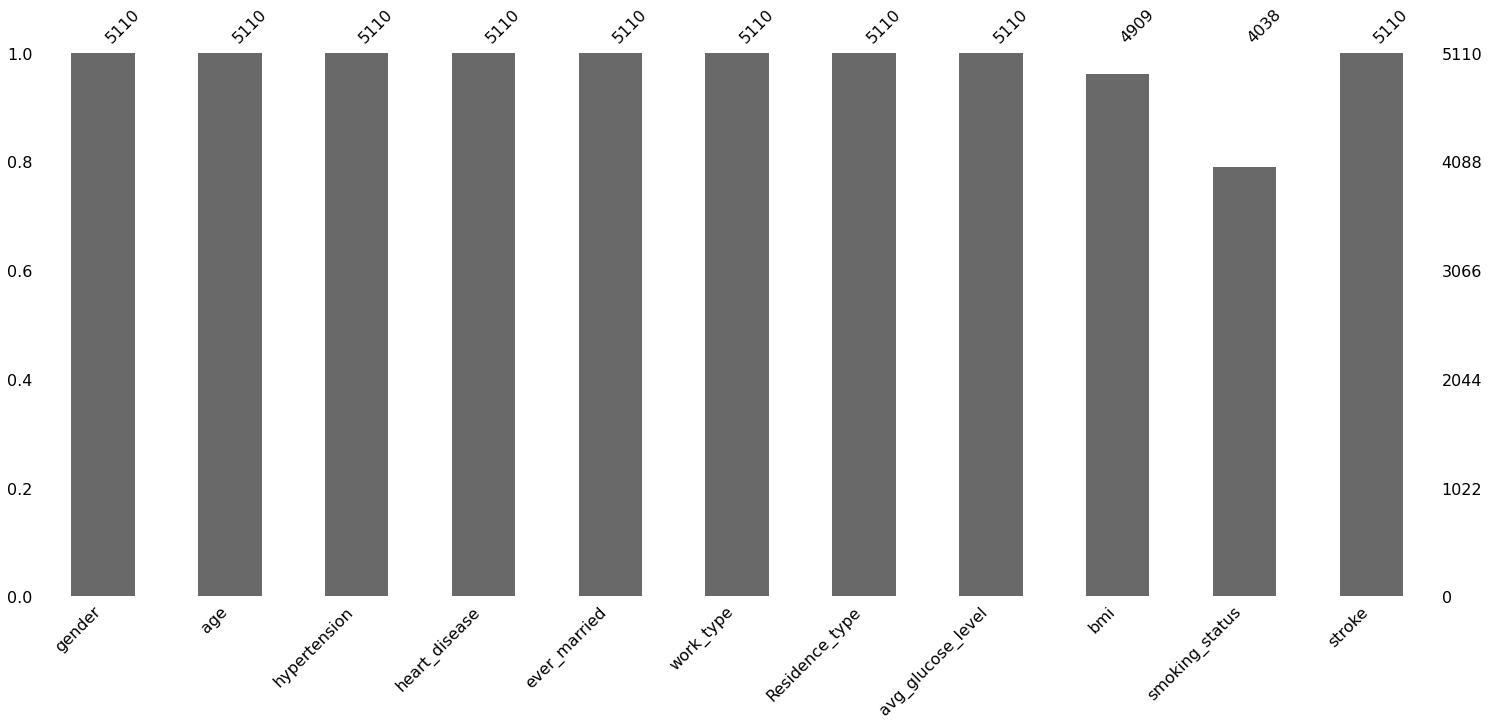

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df = df[df['smoking_status'].notna()]

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


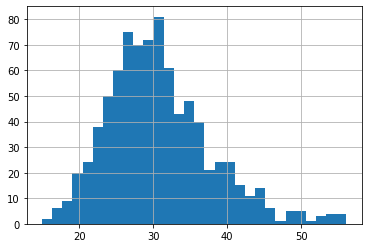

In [ ]:
df[df['smoking_status']=='formerly smoked']['bmi'].hist(bins=30)

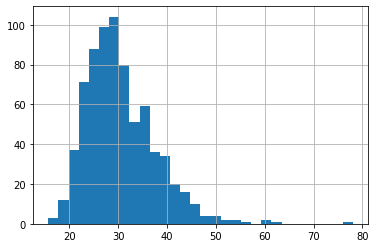

In [ ]:
df[df['smoking_status']=='smokes']['bmi'].hist(bins=30)

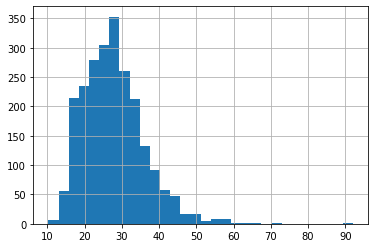

In [ ]:
df[df['smoking_status']=='never smoked']['bmi'].hist(bins=30)

In [ ]:
categorical_feature=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
encoder=LabelEncoder()

In [ ]:
categorical_fea=[feature for feature in df.columns if df[feature].dtypes=='object']
# categorical_fea=['gender','ever_married','Residence_type']
df[categorical_fea].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
for feature in categorical_fea:
  df[feature]=encoder.fit_transform(df[feature])
  print(encoder.classes_)

  # .to_numpy().reshape(-1,1)

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['formerly smoked' 'never smoked' 'smokes']


In [ ]:
df_nonulls=df[df['bmi'].notna()]
df_nulls=df[~df['bmi'].notna()]

In [ ]:
df_nonulls

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,3,0,71.97,28.3,1,0
5102,0,57.0,0,0,1,2,0,77.93,21.7,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0


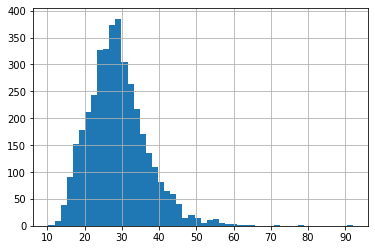

In [ ]:
df_nonulls['bmi'].hist(bins=50)

In [ ]:
X=df_nonulls.drop(['bmi'],axis=1)
y=df_nonulls['bmi']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=X_train.copy()
X_train_scaled[['age','avg_glucose_level']]=scaler.fit_transform(X_train[['age','avg_glucose_level']])
X_test_scaled=X_test.copy()
X_test_scaled[['age','avg_glucose_level']]=scaler.transform(X_test[['age','avg_glucose_level']])

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,ElasticNet
lm=ElasticNet(alpha=0.01)
lm.fit(X_train_scaled,y_train)
preds=lm.predict(X_test_scaled)

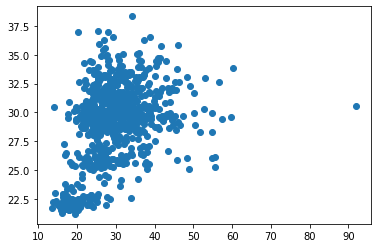

In [ ]:
plt.scatter(y_test,preds)

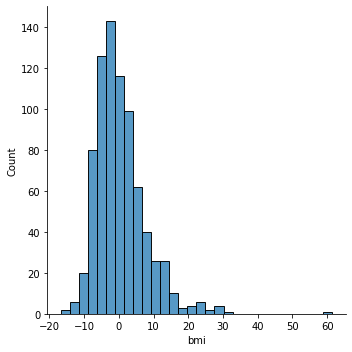

In [ ]:
sns.displot((y_test-preds),bins=30)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('R_2:',metrics.r2_score(y_test,preds))
print('MAPE:',metrics.mean_absolute_percentage_error(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,preds)))

MAE: 5.32397702817167
R_2: 0.18276193275588737
MAPE: 0.18108176382643826
MSE: 54.06712686830373
RMSE: 2.307374488064664


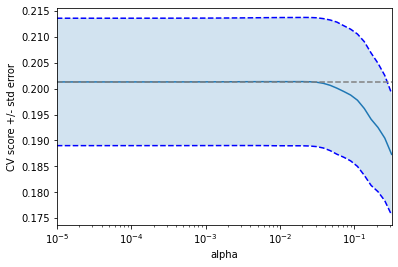

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso(random_state=42,max_iter=10000)
alphas=np.logspace(-5,-0.5,50)
tuned_params=[{'alpha':alphas}]
n_folds=5

clf=GridSearchCV(lasso,tuned_params,cv=n_folds,refit=False)
clf.fit(X_train_scaled,y_train)
scores=clf.cv_results_['mean_test_score']
scores_std=clf.cv_results_['std_test_score']
# lasso.fit(X_train_scaled,y_train)
plt.semilogx(alphas,scores)

std_error=scores_std/np.sqrt(n_folds)
plt.semilogx(alphas,scores+std_error,'b--')
plt.semilogx(alphas,scores-std_error,'b--')
plt.fill_between(alphas,scores+std_error,scores-std_error,alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores),linestyle='--',color='0.5')
plt.xlim([alphas[0],alphas[-1]])

plt.show()

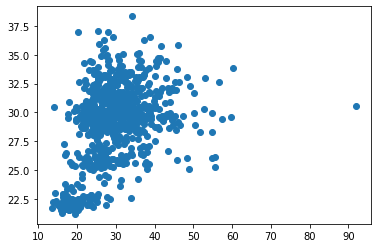

In [ ]:
plt.scatter(y_test,preds) 

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('R_2:',metrics.r2_score(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test,preds))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,preds)))

MAE: 5.32397702817167
R_2: 0.18276193275588737
MSE: 54.06712686830373
MAPE: 0.18108176382643826
RMSE: 2.307374488064664


In [ ]:
lasso_f=Lasso(alpha=0.01)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

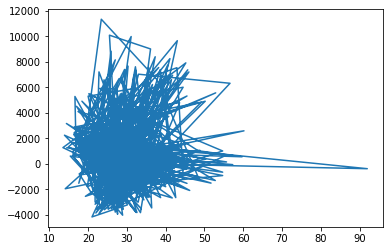

In [ ]:
poly_model=make_pipeline(PolynomialFeatures(2),lasso)
poly_model.fit(X_train_scaled,y_train)
preds=poly_model.predict(X_test)
plt.plot(y_test,preds)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('R_2:',metrics.r2_score(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test,preds))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,preds)))

MAE: 1824.5626306867441
R_2: -101398.49930443696
MSE: 6708424.1581686605
MAPE: 65.33042328730504
RMSE: 42.71489939923474


In [ ]:
lm=Lasso(alpha=0.01)
lm.fit(X_train_scaled,y_train)
preds=lm.predict(X_test_scaled)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('R_2:',metrics.r2_score(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test,preds))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,preds)))

MAE: 5.325169942702709
R_2: 0.18272633968231344
MSE: 54.06948164753109
MAPE: 0.18111958417751103
RMSE: 2.307632974002302


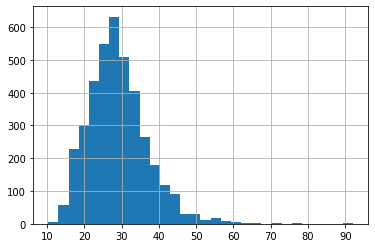

In [ ]:
df_nonulls['bmi'].hist(bins=30)

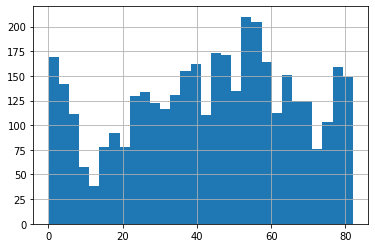

In [ ]:
df_nonulls['age'].hist(bins=30)

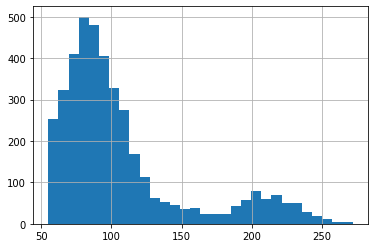

In [ ]:
df['avg_glucose_level'].hist(bins=30)

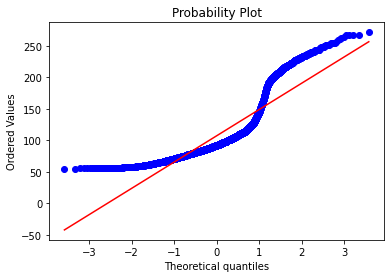

In [ ]:
import scipy,matplotlib
scipy.stats.probplot(df['avg_glucose_level'],dist='norm',plot=matplotlib.pyplot);

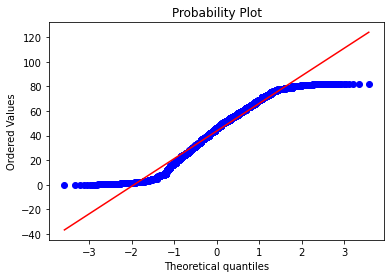

In [ ]:
scipy.stats.probplot(df['age'],dist='norm',plot=matplotlib.pyplot);

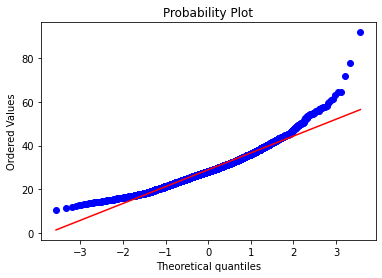

In [ ]:
scipy.stats.probplot(df_nonulls['bmi'],dist='norm',plot=matplotlib.pyplot);

In [ ]:
df_smoke_bmi=df_nonulls[['smoking_status','bmi']]

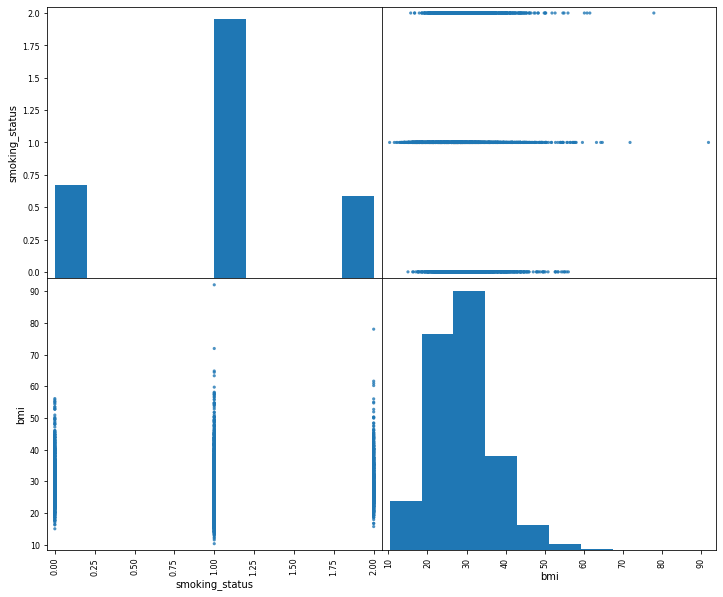

In [ ]:
from pandas.plotting import scatter_matrix
plot = scatter_matrix(df_smoke_bmi,figsize=(12,10),marker='o',s=10,alpha=.8)

In [ ]:
# ['formerly smoked' 'never smoked' 'smokes']=[0,1,2]

In [ ]:
# i=0
# for x,y in zip(preds,y_test.values):
#   if abs(round(x,1)-y)>5.5:
#     i+=1
#     print(f'predicted:{round(x,1)}, actual:{y}')

# print(i)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1,shuffle=True)

In [ ]:
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation.sort_values(by='RMSE')

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
6,Gradient Boosting Regressor,6.644715,0.273673
1,Ridge Regression,6.966276,0.201780
0,Linear Regression,6.966383,0.201755
5,Random Forest Regressor,7.040628,0.177808
3,K Neighbors Regressor,7.186400,0.149213
2,Lasso Regression,7.206311,0.145966
7,Adaboost Regressor,7.493043,0.059081
4,Decision Tree Regressor,9.677551,-0.519063


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,50,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                          min_samples_split=100, n_estimators=20,
                          random_state=1)
R Squared: 0.2484346394507983
